# 6.6 Sourcing & Analyzing Time Series Data

## This script contains the following:

### 1. Importing libraries and data
### 2. Subsetting, wrangling and cleaning time-series data
### 3. Time series analysis: decomposition
### 4. Testing for stationarity
### 5. Stationarizing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
path = r'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6'

In [3]:
path

'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6'

In [4]:
#Import us_births_month_year.csv -- had to download additional data as my previous data only had year

births= pd.read_csv(os.path.join(path, '02 Data', 'Original data', 'us_births_month_year_final.csv'), index_col = False)

In [5]:
births.head()

,Date,Births
0,1/1/16,316707
1,2/1/16,306015
2,3/1/16,328526
3,4/1/16,313485
4,5/1/16,327631


In [6]:
births.columns

Index(['Date', 'Births'], dtype='object')

In [7]:
births.shape

(72, 2)

## 2. Subsetting, wrangling and cleaning time-series data

#### The data includes US births from 2016 to 2021, there is no major event or cause to remove any data.

In [9]:
# Set the "Date" column as the index

from datetime import datetime

births['datetime'] = pd.to_datetime(births['Date']) # Create a datetime column from "Date.""
births = births.set_index('datetime') # Set the datetime as the index of the dataframe.
births.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
births.head()

,Births
datetime,
2016-01-01,316707
2016-02-01,306015
2016-03-01,328526
2016-04-01,313485
2016-05-01,327631


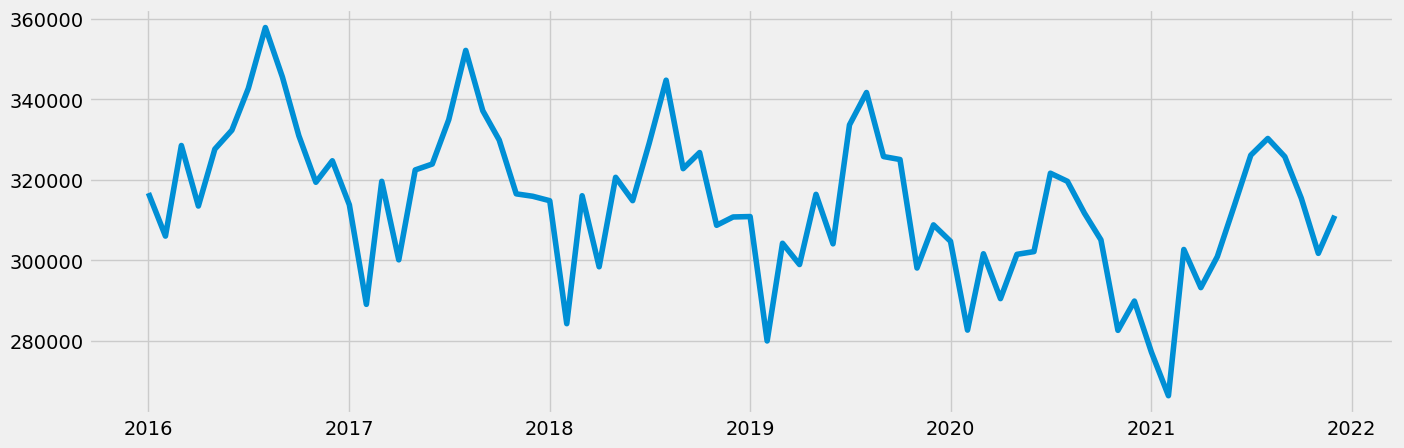

In [11]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(births)

In [12]:
births.head()

,Births
datetime,
2016-01-01,316707
2016-02-01,306015
2016-03-01,328526
2016-04-01,313485
2016-05-01,327631


In [13]:
# checking for missing values
births.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             Births
datetime          
2016-01-01   False
2016-02-01   False
2016-03-01   False
2016-04-01   False
2016-05-01   False
...            ...
2021-08-01   False
2021-09-01   False
2021-10-01   False
2021-11-01   False
2021-12-01   False

[72 rows x 1 columns]>

In [14]:
# Check for duplicates

dups = births.duplicated()
dups.sum()

# No dups!

0

## 3. Time-series analysis: decomposition

In [15]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(births, model='additive')

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

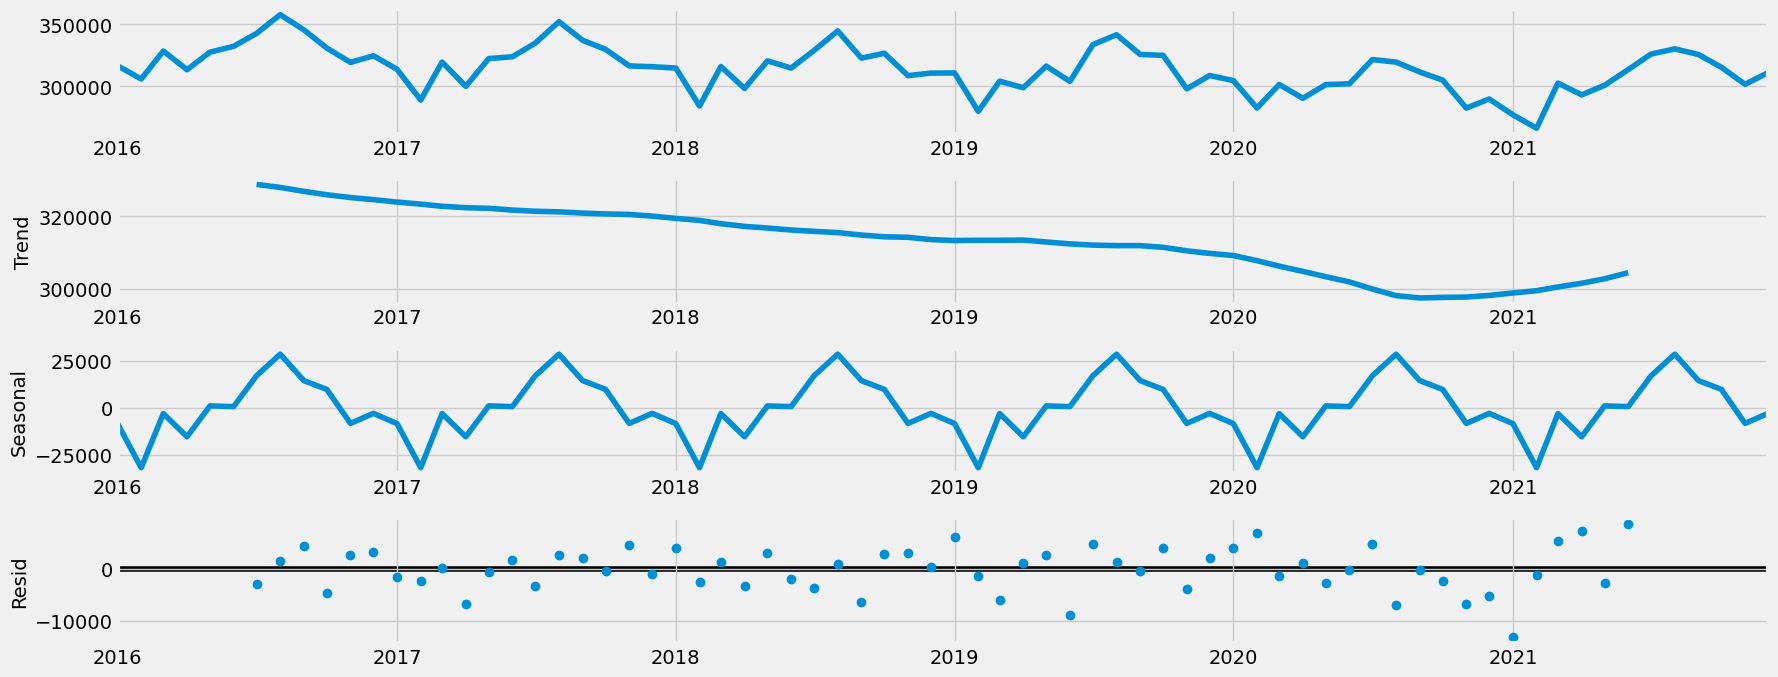

In [17]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Overall we can see there is a lot of noise as the level line and trend line look very different. The trend line shows that overall births in the US were deceasing until mid-way through 2020 when they started to slowly increase. We can see in the third seasonality line that that the lowest amount of births occur early in the year (January/February) and the most amount of births occurs in the late summer. The residual line shows that there is some unexplained noise.

## 4. Testing for stationarity

In [19]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(births['Births'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.736727
p-value                         0.412296
Number of Lags Used            12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


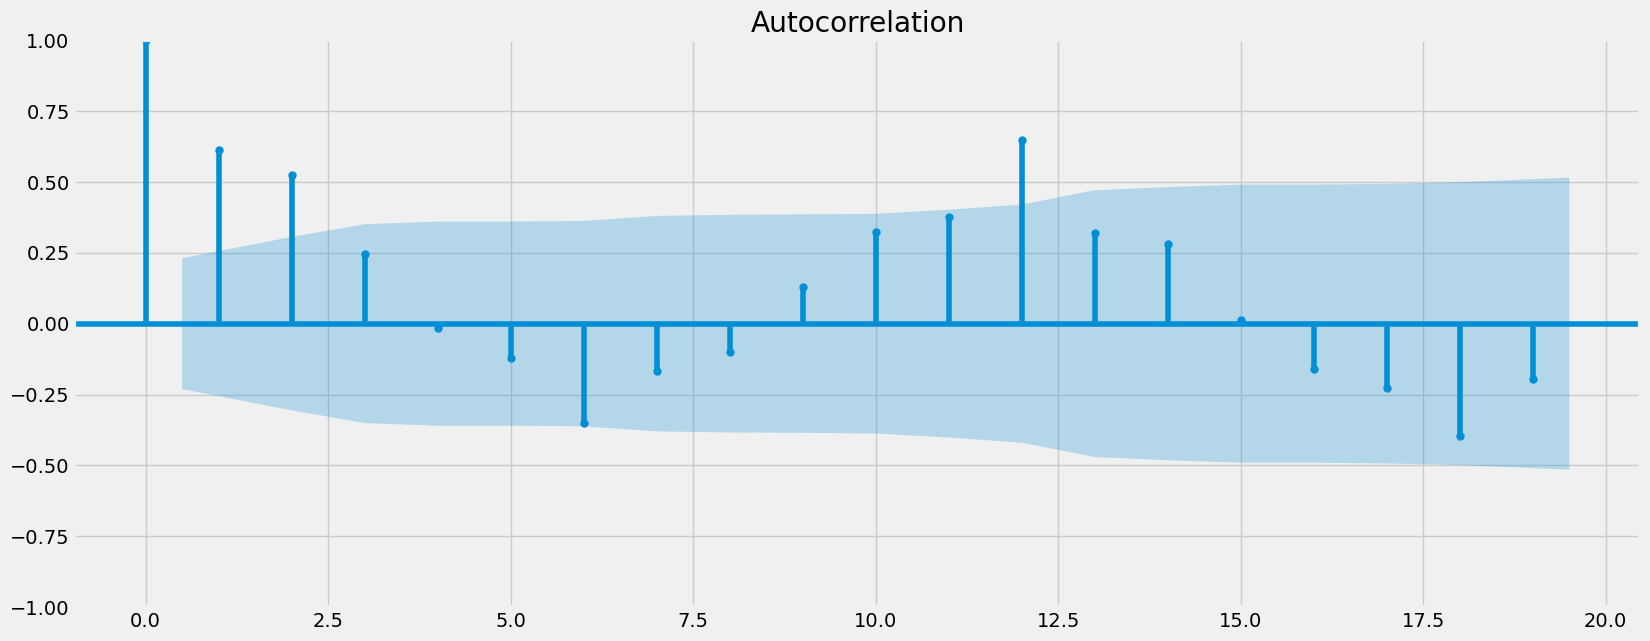

In [20]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(births)
plt.show()

#### I can't reject the null hypothesis as the critical values are much smaller than the test statistic. Additionally the p-value indicates that the test result is not significant. The data is non-stationary. I will need to try to make it stationary. 

## 5. Stationarizing

In [21]:
births_diff = births - births.shift(1)

In [22]:
births_diff.dropna(inplace = True)

In [23]:
births_diff.head()

,Births
datetime,
2016-02-01,-10692.0
2016-03-01,22511.0
2016-04-01,-15041.0
2016-05-01,14146.0
2016-06-01,4693.0


In [24]:
births_diff.columns

Index(['Births'], dtype='object')

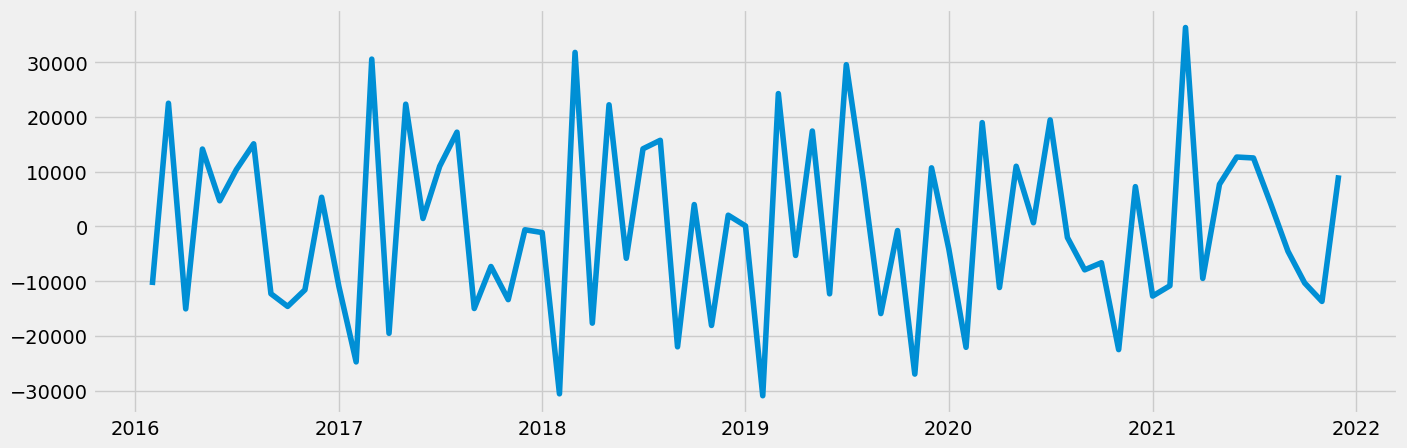

In [33]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(births_diff)

In [26]:
dickey_fuller(births_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.155224
p-value                         0.222896
Number of Lags Used            11.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


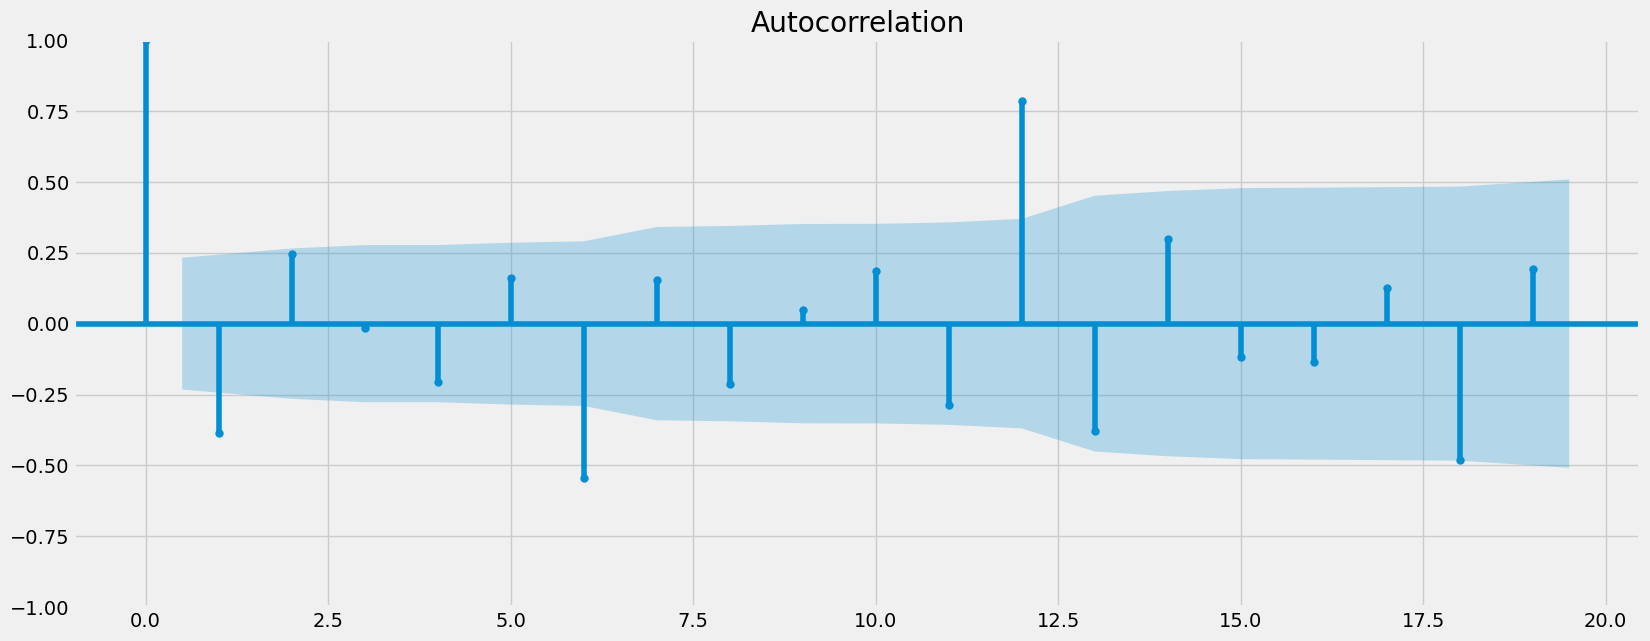

In [28]:
plot_acf(births_diff)
plt.show()

####  I still can't reject the null hypothesis as the critical values are much smaller than the test statistic.  The data is still non-stationary. I will need to conduct another round of differencing on it.

In [29]:
births_diff2 = births_diff - births_diff.shift(1)

In [30]:
births_diff2.dropna(inplace = True)

In [31]:
births_diff2.head()

,Births
datetime,
2016-03-01,33203.0
2016-04-01,-37552.0
2016-05-01,29187.0
2016-06-01,-9453.0
2016-07-01,5711.0


In [32]:
births_diff2.columns

Index(['Births'], dtype='object')

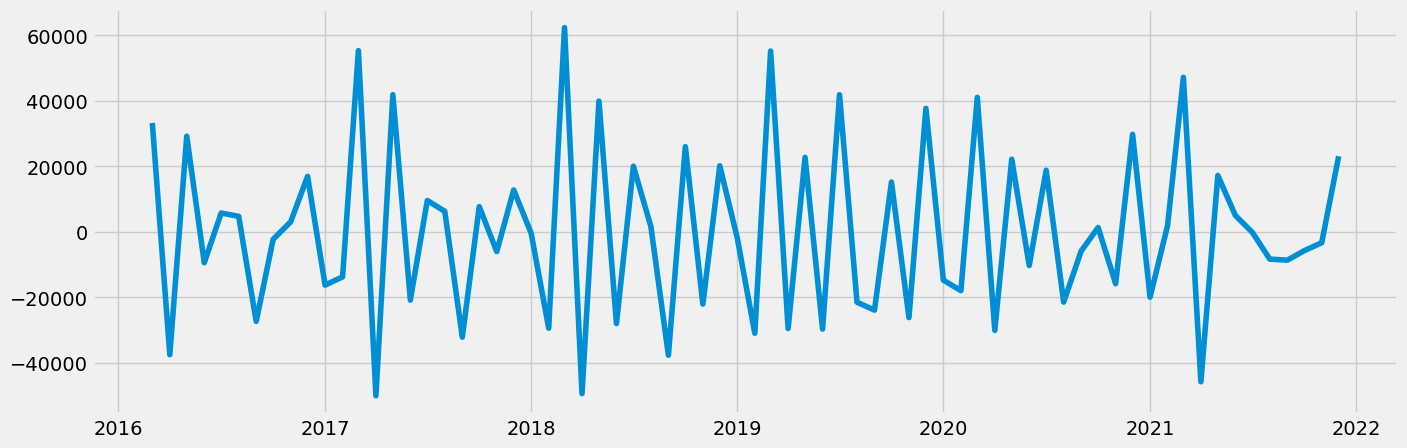

In [34]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(births_diff2)

In [35]:
dickey_fuller(births_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -8.276102e+00
p-value                        4.652091e-13
Number of Lags Used            1.100000e+01
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


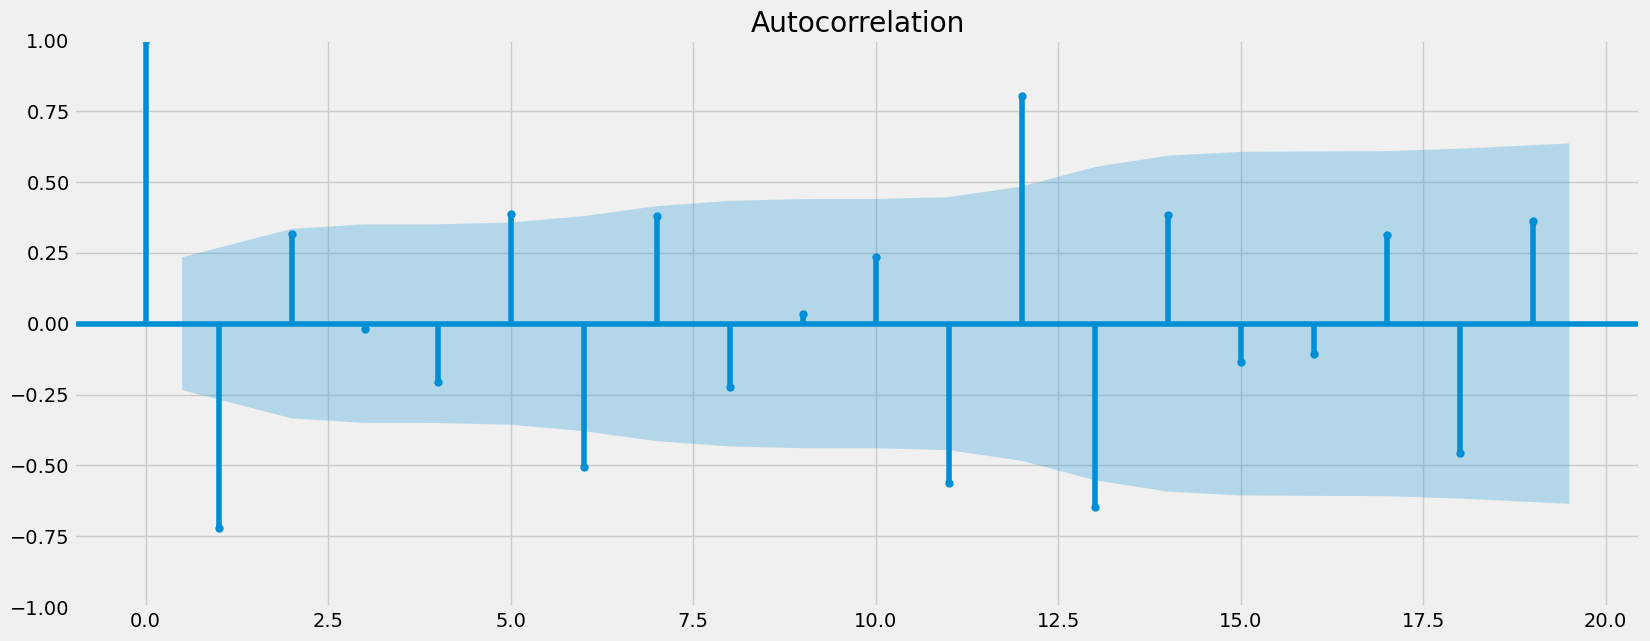

In [36]:
plot_acf(births_diff2)
plt.show()

#### The data is now stationary as the critical values are much larger than the test statistic. However, the autocorrelation plot still shos lags meaning the stationarity is weak. 